In [6]:
# Load libraries
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import csv file to google colab
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [22]:
#read the csv file using pandas
bank_df = pd.read_csv(io.BytesIO(uploaded(['bank-additional-full.csv'], delimiter = ';')))
# Dataset is now stored in a Pandas Dataframe

bank_df

TypeError: ignored

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [10]:
# Provide the Summary Statistics of the Dataset

bank_df.describe(include = "all")

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
count,41188
unique,41176
top,"24;""services"";""single"";""high.school"";""no"";""yes..."
freq,2


In [ ]:
# Checking the missing values
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

ValueError: ignored

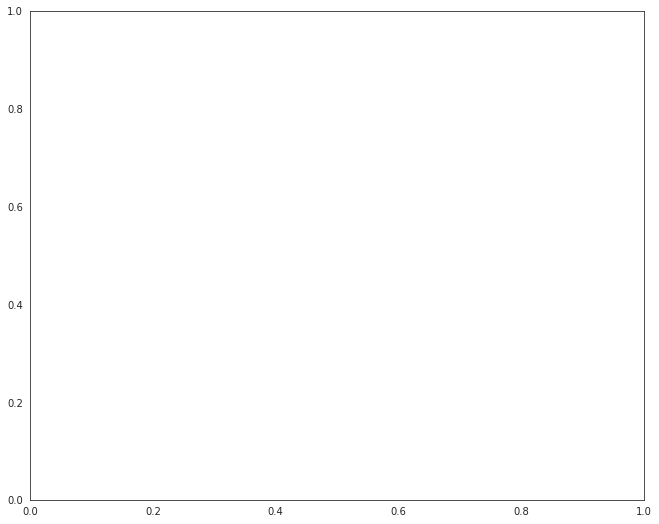

In [17]:
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = bank_df.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
# data cleaning for accurate result
# drop some irrelevant data 
bank_df.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
              'month', 'day_of_week', 'duration', 'poutcome'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
y_transform = labelencoder.fit_transform(bank_df.y)

In [ ]:
y_transform

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = bank_df.iloc[:, : -1]

# y = target values, last column of the data frame
z = bank_df.iloc[:, -1]

In [ ]:
# Data Pre-processing (Data preparation). Data normalization. 
# map all values in every columns to the range of 0 and 1.

from sklearn import preprocessing

feature_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

X = feature_scaler.fit_transform(X)
z = target_scaler.fit_transform(y_transform.reshape(-1, 1))

In [ ]:
print(X.shape)
print(z.shape)

(41188, 8)
(41188, 1)


In [ ]:
# Installing neupy (Artificial Neural Network module)

!pip install neupy

ERROR: Could not find a version that satisfies the requirement tensorflow<1.14.0,>=1.10.1 (from neupy) (from versions: 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.8.0rc0, 2.8.0rc1)
ERROR: No matching distribution found for tensorflow<1.14.0,>=1.10.1 (from neupy)



  Using cached neupy-0.8.2-py2.py3-none-any.whl (226 kB)
  Using cached graphviz-0.5.1-py2.py3-none-any.whl (14 kB)


In [ ]:
# Splitting dataset 

import neupy
from sklearn.model_selection import train_test_split
from neupy import utils
from neupy.utils.misc import reproducible

# Make sure that split between train and
# validation datasets will be reproducible
utils.reproducible()


X_train, X_test, z_train, z_test = train_test_split(
    # 85% of the data we will use for training
    # and the other 15% will be used for validation
    data, target, test_size=0.2
)

ModuleNotFoundError: No module named 'neupy'

In [ ]:
# Importing a large training algorithm 
# supported by neupy (the LevenbergMarquardt algorithm)

from neupy import algorithms

optimizer = algorithms.LevenbergMarquardt(
    # First argument has to be neural network
    network,

    # With this option enabled network shows its configuration
    # before the training and its progress during the training
    verbose=True,

    # In order to avoid showing information about
    # network training progress after every epoch we can
    # do it less frequently, for example, every 5th epoch.
    show_epoch=5,
)

In [ ]:
optimizer.train(x_train, y_train, x_test, y_test, epochs=30) # Training and validating the dataset

In [ ]:
optimizer.plot_errors()

In [ ]:
import numpy as np

def rmsle(expected, predicted):
    log_expected = np.log1p(expected + 1)
    log_predicted = np.log1p(predicted + 1)
    squared_log_error = np.square(log_expected - log_predicted)
    return np.sqrt(np.mean(squared_log_error))

y_predict = optimizer.predict(x_test).round(1)
error = rmsle(
    target_scaler.inverse_transform(y_test),
    target_scaler.inverse_transform(y_predict),
)
print(error)